In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('quikr_car.csv')
df.sample(9)

,name,company,year,Price,kms_driven,fuel_type
21,Mahindra Scorpio S10,Mahindra,2016,"3,10,000","39,522 kms",Diesel
550,Ford EcoSport Trend 1.5 Ti VCT,Ford,2017,"5,80,000","10,000 kms",Petrol
97,Ford Figo Diesel EXI Option,Ford,2012,"2,10,000","35,000 kms",Diesel
608,tata Indica,tata,sale,"1,30,000",NaN,NaN
200,Maruti Suzuki Wagon R LXI BS IV,Maruti,2011,"2,10,000","35,000 kms",Petrol
146,Mahindra Scorpio,Mahindra,2015,"9,84,999","22,000 kms",Diesel
34,Maruti Suzuki Wagon R VXi Minor,Maruti,2013,"1,05,000","39,000 kms",Petrol
698,Mercedes Benz C Class C 220 CDI Avantgarde,Mercedes,2009,"12,25,000","76,000 kms",Diesel
542,Maruti Suzuki Alto,Maruti,2010,"1,10,000","55,000 kms",Petrol


In [3]:
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [4]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [5]:
df.shape

(892, 6)

In [6]:
df1 = df.copy()

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


**Data Cleaning**

In [8]:
df1['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

year has lot of non-numeric values

In [9]:
df1 = df1[df1['year'].str.isnumeric()]

In [10]:
df1['year'] = df1['year'].astype(int)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int64 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int64(1), object(5)
memory usage: 46.0+ KB


In [12]:
df1.shape

(842, 6)

In [13]:
df1['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [14]:
df1['Price'].str.isnumeric()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
888    False
889    False
890    False
891    False
Name: Price, Length: 842, dtype: bool

In [15]:
("1490,000".replace(',','')).isnumeric()

True

In [16]:
def removecomma(text):
  return text.replace(',','')

In [17]:
df1['Price'] = df1['Price'].apply(removecomma)

In [18]:
df2 = df1[df1['Price'].str.isnumeric()]

In [19]:
df2.shape

(819, 6)

In [20]:
df2['Price'] = df2['Price'].astype(int)

<ipython-input-20-f891cac1a372>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Price'] = df2['Price'].astype(int)


In [21]:
df2.dtypes

name          object
company       object
year           int64
Price          int64
kms_driven    object
fuel_type     object
dtype: object

In [22]:
df2.sample(5)

,name,company,year,Price,kms_driven,fuel_type
471,Tata Indigo CS eLS BS IV,Tata,2015,123000,"1,00,000 kms",Diesel
46,Honda City,Honda,2015,499999,"55,000 kms",Petrol
230,Audi A4 1.8 TFSI Multitronic Premium Plus,Audi,2009,699000,"47,000 kms",Petrol
712,Honda WR V S MT Petrol,Honda,2009,250000,"60,000 kms",Petrol
169,Tata Indigo CS,Tata,2011,85000,"11,400 kms",Diesel


In [23]:
df2.shape

(819, 6)

In [24]:
df2['kms_driven'].unique()

array(['45,000 kms', '40 kms', '28,000 kms', '36,000 kms', '41,000 kms',
       '25,000 kms', '24,530 kms', '60,000 kms', '30,000 kms',
       '32,000 kms', '48,660 kms', '4,000 kms', '16,934 kms',
       '43,000 kms', '35,550 kms', '39,522 kms', '39,000 kms',
       '55,000 kms', '72,000 kms', '15,975 kms', '70,000 kms',
       '23,452 kms', '35,522 kms', '48,508 kms', '15,487 kms',
       '82,000 kms', '20,000 kms', '68,000 kms', '38,000 kms',
       '27,000 kms', '33,000 kms', '46,000 kms', '16,000 kms',
       '47,000 kms', '35,000 kms', '30,874 kms', '15,000 kms',
       '29,685 kms', '1,30,000 kms', '19,000 kms', '54,000 kms',
       '13,000 kms', '38,200 kms', '22,000 kms', '50,000 kms',
       '13,500 kms', '3,600 kms', '45,863 kms', '60,500 kms',
       '12,500 kms', '18,000 kms', '13,349 kms', '29,000 kms',
       '44,000 kms', '42,000 kms', '14,000 kms', '49,000 kms',
       '36,200 kms', '51,000 kms', '1,04,000 kms', '33,333 kms',
       '33,600 kms', '5,600 kms', '7,500 km

In [25]:
df3=df2.copy()

In [26]:
df3['kms_driven'] = df3['kms_driven'].apply(removecomma)

In [27]:
df3['kms_driven'].unique()

array(['45000 kms', '40 kms', '28000 kms', '36000 kms', '41000 kms',
       '25000 kms', '24530 kms', '60000 kms', '30000 kms', '32000 kms',
       '48660 kms', '4000 kms', '16934 kms', '43000 kms', '35550 kms',
       '39522 kms', '39000 kms', '55000 kms', '72000 kms', '15975 kms',
       '70000 kms', '23452 kms', '35522 kms', '48508 kms', '15487 kms',
       '82000 kms', '20000 kms', '68000 kms', '38000 kms', '27000 kms',
       '33000 kms', '46000 kms', '16000 kms', '47000 kms', '35000 kms',
       '30874 kms', '15000 kms', '29685 kms', '130000 kms', '19000 kms',
       '54000 kms', '13000 kms', '38200 kms', '22000 kms', '50000 kms',
       '13500 kms', '3600 kms', '45863 kms', '60500 kms', '12500 kms',
       '18000 kms', '13349 kms', '29000 kms', '44000 kms', '42000 kms',
       '14000 kms', '49000 kms', '36200 kms', '51000 kms', '104000 kms',
       '33333 kms', '33600 kms', '5600 kms', '7500 kms', '26000 kms',
       '24330 kms', '65480 kms', '200000 kms', '59000 kms', '99000 km

In [28]:
df3['kms_driven'] = df3['kms_driven'].apply(lambda x: x.replace(' kms',''))

In [29]:
df3['kms_driven'].unique()

array(['45000', '40', '28000', '36000', '41000', '25000', '24530',
       '60000', '30000', '32000', '48660', '4000', '16934', '43000',
       '35550', '39522', '39000', '55000', '72000', '15975', '70000',
       '23452', '35522', '48508', '15487', '82000', '20000', '68000',
       '38000', '27000', '33000', '46000', '16000', '47000', '35000',
       '30874', '15000', '29685', '130000', '19000', '54000', '13000',
       '38200', '22000', '50000', '13500', '3600', '45863', '60500',
       '12500', '18000', '13349', '29000', '44000', '42000', '14000',
       '49000', '36200', '51000', '104000', '33333', '33600', '5600',
       '7500', '26000', '24330', '65480', '200000', '59000', '99000',
       '2800', '21000', '11000', '66000', '3000', '7000', '38500',
       '37200', '43200', '24800', '45872', '40000', '11400', '97200',
       '52000', '31000', '175430', '37000', '65000', '3350', '75000',
       '62000', '73000', '2200', '54870', '34580', '97000', '60', '80200',
       '3200', '0000',

In [30]:
df3 = df3[df3['kms_driven']!='Petrol']

In [31]:
df3['kms_driven'] = df3['kms_driven'].astype(int)

In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int64 
 4   kms_driven  817 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.7+ KB


In [33]:
df3['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [34]:
df3['fuel_type'].value_counts()

Petrol    428
Diesel    386
LPG         2
Name: fuel_type, dtype: int64

In [35]:
df3.dropna(inplace=True)

In [36]:
df3.shape

(816, 6)

In [37]:
df3['fuel_type'].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

In [38]:
df4=df3.copy()

In [39]:
#We will take the first three words
df4['name'] = df4['name'].apply(lambda x:  ' '.join(x.split()[:3]))

In [40]:
df4.sample(10)

,name,company,year,Price,kms_driven,fuel_type
411,Hyundai Grand i10,Hyundai,2017,450000,15141,Petrol
324,Hyundai Verna Fluidic,Hyundai,2012,444999,40000,Diesel
271,Renault Duster 85,Renault,2013,489999,27000,Diesel
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
481,Toyota Corolla Altis,Toyota,2010,220000,58000,Petrol
446,Skoda Superb 1.8,Skoda,2011,530000,68000,Petrol
364,Mahindra Jeep MM,Mahindra,2019,390000,60,Diesel
470,Maruti Suzuki Swift,Maruti,2011,230000,65,Petrol
775,Tata Indica V2,Tata,2012,115000,64000,Diesel
140,Toyota Corolla Altis,Toyota,2010,289999,70000,Petrol


In [41]:
df4.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


**Visualization**

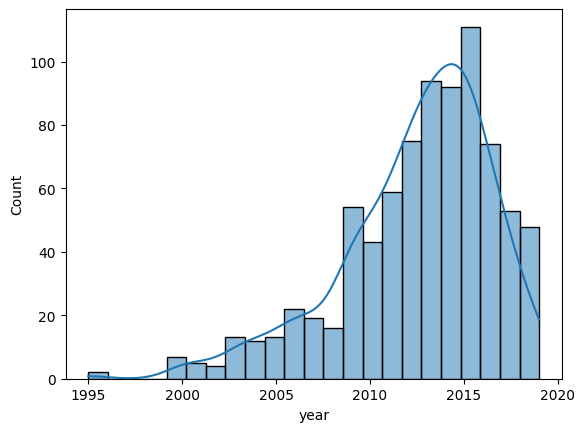

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

#Distrubution of year

sns.histplot(df4['year'], kde=True)
plt.xlabel('year')
plt.ylabel('Count')
plt.show()


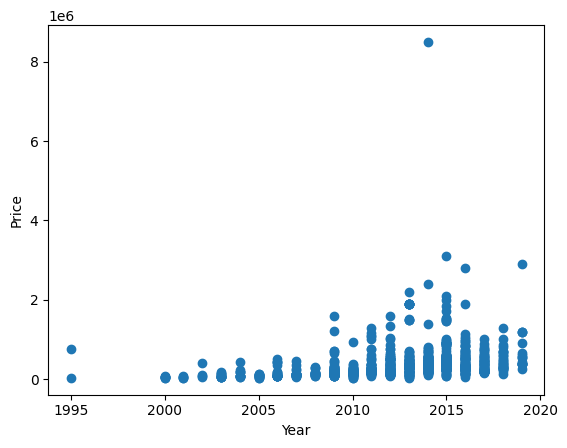

In [43]:
#Distribution of Price with year
plt.scatter(df4['year'],df4['Price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [44]:
df4['Price'].nlargest(10)

562    8500003
719    3100000
838    2900000
510    2800000
668    2390000
667    2190000
232    2100000
231    2000000
678    1900000
73     1891111
Name: Price, dtype: int64

In [45]:
df4.shape

(816, 6)

In [46]:
df4 = df4[df4['Price']<3100000]

In [47]:
df4 = df4[df4['year']>1999]

In [48]:
df5=df4.copy()

**Model Building**

In [49]:
#Extracting year and kms_driven columns from df4
featrues_to_normalize = ['year','kms_driven']
features = df5[featrues_to_normalize]
features

,year,kms_driven
0,2007,45000
1,2006,40
3,2014,28000
4,2014,36000
6,2012,41000
...,...,...
883,2011,50000
885,2009,30000
886,2009,132000
888,2018,27000


In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)
df5[featrues_to_normalize] = scaled_features
df5.head(10)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,0.368421,80000,0.112500,Petrol
1,Mahindra Jeep CL550,Mahindra,0.315789,425000,0.000100,Diesel
3,Hyundai Grand i10,Hyundai,0.736842,325000,0.070000,Petrol
4,Ford EcoSport Titanium,Ford,0.736842,575000,0.090000,Diesel
6,Ford Figo,Ford,0.631579,175000,0.102500,Diesel
7,Hyundai Eon,Hyundai,0.684211,190000,0.062500,Petrol
8,Ford EcoSport Ambiente,Ford,0.842105,830000,0.061325,Diesel
9,Maruti Suzuki Alto,Maruti,0.789474,250000,0.150000,Petrol
10,Skoda Fabia Classic,Skoda,0.526316,182000,0.150000,Petrol
11,Maruti Suzuki Stingray,Maruti,0.789474,315000,0.075000,Petrol


In [77]:
df5.dtypes

name           object
company        object
year          float64
Price           int64
kms_driven    float64
fuel_type      object
dtype: object

In [51]:
#Save scaling parameters
scaling_params = {
    'min_values':scaler.data_min_,
    'max_values':scaler.data_max_
}
scaling_params

{'min_values': array([2000.,    0.]), 'max_values': array([  2019., 400000.])}

In [52]:
#One Hot Encoding of name, company and fuel_type
dummies = pd.get_dummies(df5[['name','company','fuel_type']])
df6 = pd.concat([df5[['year','kms_driven']],dummies], axis='columns')

In [53]:
df6.shape

(812, 283)

In [54]:
X=df6
y=df5['Price']

In [55]:
X.shape

(812, 283)

In [56]:
y.shape

(812,)

In [57]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()

#X[['year', 'kms_driven']] = scaler.fit_transform(X[['year','kms_driven']])

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [59]:
from sklearn.linear_model import LinearRegression
model_l = LinearRegression()
model_l.fit(X_train,y_train)
y_pred_l = model_l.predict(X_test)

In [60]:
from sklearn.ensemble import RandomForestRegressor
model_r = RandomForestRegressor()
model_r.fit(X_train,y_train)
y_pred_r = model_r.predict(X_test)

In [61]:
from sklearn.svm import SVR
model_s = SVR()
model_s.fit(X_train,y_train)
y_pred_s = model_s.predict(X_test)

In [62]:
from sklearn.metrics import r2_score
print("r2score--------------")
print("Linear regression= ", r2_score(y_test,y_pred_l))
print("Random Forest regression= ", r2_score(y_test,y_pred_r))
print("Support Vectore regression= ", r2_score(y_test,y_pred_s))


r2score--------------
Linear regression=  -3.3695963709195785e+25
Random Forest regression=  0.6893186067857425
Support Vectore regression=  -0.08083819525331815


**Prediction**

In [63]:
X_test.sample(3)

,year,kms_driven,name_Audi A4 1.8,name_Audi A4 2.0,name_Audi A6 2.0,name_Audi A8,name_Audi Q3 2.0,name_Audi Q5 2.0,name_Audi Q7,name_BMW 3 Series,...,company_Nissan,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,company_Volvo,fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol
68,0.789474,0.075000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
573,0.736842,0.075503,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
827,0.736842,0.077500,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [64]:
data_to_predict = {
    'name': ['Hyundai Eon Era'],
    'company':['Hyundai'],
    'year': [2014],
    'kms_driven':[28000],
    'fuel_type': ['Petrol']
}
pred_df = pd.DataFrame(data_to_predict)
pred_df

,name,company,year,kms_driven,fuel_type
0,Hyundai Eon Era,Hyundai,2014,28000,Petrol


In [65]:
#Perform scaling on the new data
featrues_to_normalize = ['year','kms_driven']
scaled = scaler.transform(pred_df[featrues_to_normalize])
scaled

array([[0.73684211, 0.07      ]])

In [66]:
pred_df[featrues_to_normalize] = scaled
pred_df

,name,company,year,kms_driven,fuel_type
0,Hyundai Eon Era,Hyundai,0.736842,0.07,Petrol


In [67]:
#Perform One Hot Encoding on the new data
one_hot_encoded_new = pd.get_dummies(pred_df[['name','company','fuel_type']])
pred_df_encoded = pd.concat([pred_df[['year','kms_driven']],one_hot_encoded_new],axis=1)
pred_df_encoded

,year,kms_driven,name_Hyundai Eon Era,company_Hyundai,fuel_type_Petrol
0,0.736842,0.07,1,1,1


In [ ]:
set(df6.columns)

In [69]:
set(pred_df_encoded.columns)

{'company_Hyundai',
 'fuel_type_Petrol',
 'kms_driven',
 'name_Hyundai Eon Era',
 'year'}

In [ ]:
missing_cols = set(X.columns)-set(pred_df_encoded.columns)
missing_cols

In [ ]:
for cols in missing_cols:
  pred_df_encoded[cols] = 0
pred_df_encoded

In [72]:
# Reorder the columns to match the order of X columns from the training data
pred_df_encoded = pred_df_encoded[X.columns]
pred_df_encoded

,year,kms_driven,name_Audi A4 1.8,name_Audi A4 2.0,name_Audi A6 2.0,name_Audi A8,name_Audi Q3 2.0,name_Audi Q5 2.0,name_Audi Q7,name_BMW 3 Series,...,company_Nissan,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,company_Volvo,fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol
0,0.736842,0.07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [73]:
y_pred_new = model_r.predict(pred_df_encoded)
y_pred_new

array([225639.97])

In [79]:
model_r

RandomForestRegressor()

In [78]:
import pickle

pickle.dump(model_r,open('model.pkl','wb'))
pickle.dump(df4.to_dict(),open('quickr.pkl','wb'))

In [75]:
pickle.dump(df6.to_dict(),open('encoded_df.pkl','wb'))

In [80]:
pickle.dump(scaler,open('scaled_obj.pkl','wb'))